In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import astropy.units as u
from astropy import constants
from astropy.io import fits
from astropy.coordinates import Galactic, Galactocentric, ICRS, LSR
from astropy.coordinates import (CartesianRepresentation,
                                 CartesianDifferential)


%matplotlib inline

First calculate the angular momentum direction given in Sales's paper:

In [2]:
LMC_sales = np.array([-0.97, 0.14, -0.18])

In [3]:
LMC_sales_r = np.linalg.norm(LMC_sales)

In [4]:
theta_LMC_sales = np.arctan2(LMC_sales[1], LMC_sales[0])
phi_LMC_sales = np.arccos(LMC_sales[2]/LMC_sales_r)

In [5]:
print(theta_LMC_sales, np.degrees(theta_LMC_sales))
print(phi_LMC_sales, np.degrees(phi_LMC_sales))

2.99825259854 171.787219811
1.75243590723 100.407181351


Read in a table of Milky Way dwarf masses.

In [6]:
dwarf_tbl = pd.read_table('/Users/spardy/Research/data/Auriga_data/McConnachie2012.tsv', delimiter=';')

Strip out any extra spaces to allow merging.

In [7]:
dwarf_tbl['Name'] = dwarf_tbl['Name'].apply(lambda e: e.strip())

Read in a table of positions and velocities.

In [8]:
df = pd.read_csv('/Users/spardy/Research/data/local_group_pos_vel_GaiaDR2_tableC4.txt')

Change Sagittarious's name to match with table above.

In [9]:
df.loc[7, 'Name'] = 'Sagittarius dSph'

Examine this table.

In [10]:
df

,Name,X,+X,-X,Y,+Y,-Y,Z,+Z,-Z,U,+U,-U,V,+V,-V,W,+W,-W
0,Fornax,-33.1,2.6,-2.7,-51.10,4.10,-4.20,-134.5,10.8,-11.0,34.2,22.5,-23.4,-386.0,38.0,-36.9,77.2,14.8,-14.3
1,Draco,4.0,0.3,-0.3,62.60,5.20,-4.50,43.5,3.6,-3.1,35.9,13.9,-14.8,-247.6,7.1,-7.2,-157.7,10.1,-10.2
2,Carina,-16.7,0.9,-0.9,-95.70,5.00,-5.30,-39.7,2.1,-2.2,-51.1,18.9,-18.1,-298.4,9.8,-8.9,151.4,21.1,-23.6
3,Ursa Minor,-13.9,0.5,-0.6,52.10,2.10,-2.00,53.6,2.2,-2.0,-12.8,12.2,-12.5,-205.0,10.0,-10.3,-153.7,9.7,-8.8
4,Sextans,-28.4,1.4,-1.3,-57.00,2.80,-2.50,57.9,2.6,-2.8,-253.0,17.8,-19.8,-161.1,13.0,-11.0,50.8,14.0,-12.9
5,Leo I,-115.5,7.6,-7.2,-119.60,7.90,-7.40,192.0,11.9,-12.6,-177.0,80.3,-75.9,-243.0,61.0,-55.4,113.2,44.8,-47.4
6,Leo II,-69.0,3.9,-3.8,-58.30,3.30,-3.20,215.2,11.9,-12.3,13.2,73.3,-69.1,-253.9,73.8,-66.9,18.9,27.5,-28.9
7,Sagittarius dSph,25.2,2.0,-1.8,2.50,0.20,-0.20,-6.4,0.5,-0.5,221.3,7.2,-6.2,-266.5,19.9,-22.5,197.4,18.6,-17.1
8,Sculptor,3.1,0.2,-0.2,-9.80,0.70,-0.70,-85.4,5.7,-6.1,6.2,15.3,-14.1,-74.0,15.6,-14.0,-103.5,1.8,-1.8
9,Bootes I,22.7,1.1,-1.0,-0.76,0.03,-0.04,61.0,2.8,-2.7,124.9,14.1,-15.3,-344.6,22.3,-21.6,57.9,5.7,-5.1


Merge the two tables together using the name column.

In [11]:
combined_df = pd.merge(dwarf_tbl, df, on='Name')
combined_df['Mass'] = combined_df['Mass'].astype(float)*1e+6

Examine the new table.

In [12]:
combined_df

,_RAJ2000,_DEJ2000,SubG,n_Name,Name,MType,RAJ2000,DEJ2000,D,u_D,...,-Z,U,+U,-U,V,+V,-V,W,+W,-W
0,283.8312,-30.5453,MW,G,Sagittarius dSph,dSph,18 55 19.5,-30 32 43,26,,...,-0.5,221.3,7.2,-6.2,-266.5,19.9,-22.5,197.4,18.6,-17.1
1,080.8937,-69.7561,MW,G,LMC,Irr,05 23 34.5,-69 45 22,51,,...,-1.4,-68.6,10.2,-9.7,-468.4,13.8,-13.5,201.0,18.0,-18.8
2,013.1867,-72.8286,MW,G,SMC,dIrr,00 52 44.8,-72 49 43,64,,...,-1.7,14.8,10.0,-10.0,-425.0,16.0,-15.2,167.5,13.0,-13.3
3,260.0517,+57.9153,MW,G,Draco,dSph,17 20 12.4,+57 54 55,76,,...,-3.1,35.9,13.9,-14.8,-247.6,7.1,-7.2,-157.7,10.1,-10.2
4,227.2854,+67.2225,MW,G,Ursa Minor,dSph,15 09 08.5,+67 13 21,76,,...,-2.0,-12.8,12.2,-12.5,-205.0,10.0,-10.3,-153.7,9.7,-8.8
5,015.0392,-33.7092,MW,G,Sculptor,dSph,01 00 09.4,-33 42 33,86,,...,-6.1,6.2,15.3,-14.1,-74.0,15.6,-14.0,-103.5,1.8,-1.8
6,100.4029,-50.9661,MW,G,Carina,dSph,06 41 36.7,-50 57 58,105,,...,-2.2,-51.1,18.9,-18.1,-298.4,9.8,-8.9,151.4,21.1,-23.6
7,039.9971,-34.4492,MW,G,Fornax,dSph,02 39 59.3,-34 26 57,147,,...,-11.0,34.2,22.5,-23.4,-386.0,38.0,-36.9,77.2,14.8,-14.3
8,168.3700,+22.1517,MW,G,Leo II,dSph,11 13 28.8,+22 09 06,233,,...,-12.3,13.2,73.3,-69.1,-253.9,73.8,-66.9,18.9,27.5,-28.9
9,152.1171,+12.3064,MW,"G,L",Leo I,dSph,10 08 28.1,+12 18 23,254,,...,-12.6,-177.0,80.3,-75.9,-243.0,61.0,-55.4,113.2,44.8,-47.4


And just get the order of the dwarfs.

In [13]:
combined_df.Name

0    Sagittarius dSph
1                 LMC
2                 SMC
3               Draco
4          Ursa Minor
5            Sculptor
6              Carina
7              Fornax
8              Leo II
9               Leo I
Name: Name, dtype: object

Make vectors of position and velocity.

In [14]:
R = combined_df[['X', 'Y', 'Z']]
V = combined_df[['U', 'V', 'W']]

Take the cross product of R and P (V*m)

In [15]:
L = np.cross(R.values, V.values*combined_df['Mass'].values[:, None])

And compute the norm of the angular momentum for each galaxy.

In [16]:
L_r = np.linalg.norm(L, axis=1)  # 2-norm is default

Compute the unit angular momentum for each galaxy.

In [17]:
unit_L = L/L_r[:, None]

Add this unit vector into our dataframe

In [18]:
combined_df['Lx'] = unit_L[:, 0]
combined_df['Ly'] = unit_L[:, 1]
combined_df['Lz'] = unit_L[:, 2]

And examine the vectors.

In [19]:
combined_df[['Name', 'Lx', 'Ly', 'Lz']]

,Name,Lx,Ly,Lz
0,Sagittarius dSph,-0.124260,-0.655163,-0.745198
1,LMC,-0.960540,0.021683,-0.277297
2,SMC,-0.924092,-0.167553,-0.343483
3,Draco,0.223965,0.546454,-0.806986
4,Ursa Minor,0.551391,-0.522210,0.650588
5,Sculptor,-0.998724,-0.039275,-0.031747
6,Carina,-0.985351,0.170504,0.003480
7,Fornax,-0.967215,-0.035401,0.251478
8,Leo II,0.943779,0.073065,0.322400
9,Leo I,0.832752,-0.525779,0.173436


Compute the first angle.

In [20]:
theta = np.arctan2(L[:, 1], L[:, 0])

And the second angle

In [21]:
phi = np.arccos(L[:, 2]/L_r)

Examine the angles in radians.

In [22]:
theta, phi

(array([-1.75823325,  3.11902249, -2.96222525,  1.18182581, -0.75822459,
        -3.10228808,  2.97025078, -3.10500838,  0.07726353, -0.56316997]),
 array([ 2.41162859,  1.85177548,  1.92141894,  2.50982764,  0.86243842,
         1.60254818,  1.56731632,  1.31658921,  1.24253253,  1.39647838]))

And degrees.

In [23]:
np.degrees(theta), np.degrees(phi)

(array([-100.73934472,  178.70682505, -169.72300487,   67.71363107,
         -43.44306896, -177.74801381,  170.18283365, -177.90387553,
           4.42687405,  -32.26726224]),
 array([ 138.17613975,  106.09891937,  110.08919589,  143.80253101,
          49.41408162,   91.81924734,   89.8006101 ,   75.43500501,
          71.19186986,   80.01231744]))

We appear to be very close to the angle provided by Sales.

Offset the angles to make the LMC appear at the center of the Aitoff projection.

In [24]:
x = theta-np.pi
x[x < -np.pi] += 2*np.pi

y = phi-np.pi/2.

Plot this in aitoff coordinates.

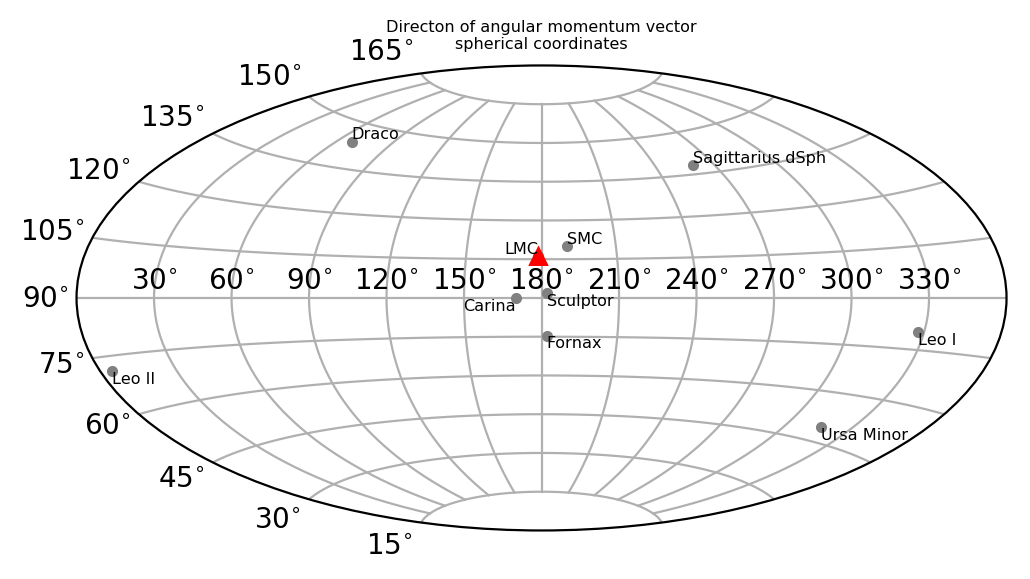

In [25]:
fig, axis = plt.subplots(1, subplot_kw={'projection': 'aitoff'}, dpi=200)

axis.plot(x, y, '.', color='gray')
axis.plot(x[1], y[1], 'r^')  # LMC

for name, x_i, phi_i in zip(combined_df.Name, x, y):
    
    # change some labels so that they don't overlap
    
    if phi_i < np.radians(10):
        va='top'
    else:
        va='bottom'
    
    if name in ['Carina', 'LMC']:
        ha = 'right'
    else:
        ha = 'left'
    
    axis.text(x_i, phi_i, name, fontsize='xx-small', ha=ha, va=va)
    
axis.set_xticklabels(['%d$^{\circ}$' % num for num in np.arange(30, 360, 30)])
axis.set_yticklabels(['%d$^{\circ}$' % num for num in np.arange(15, 180, 15)])

axis.set_title('Directon of angular momentum vector\nspherical coordinates', fontsize='xx-small')

axis.grid(True)
fig.savefig('/Users/spardy/Research/projects/Auriga/for_paper/angular_momentum.pdf', bbox_inches='tight')

Compute the cosine distance between each galaxy's angular momentum vector.

In [26]:
cos_distance = np.dot(unit_L, unit_L[1])

Sort these.

In [27]:
s = np.argsort(cos_distance)

And plot them with the names appearing on the x-axis.

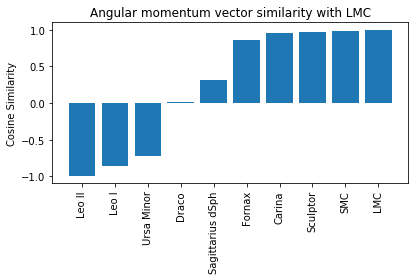

In [28]:
fig, axis = plt.subplots(1)
axis.bar(np.arange(len(s)), cos_distance[s])
axis.set_xticks(np.arange(len(s)))
_ = axis.set_xticklabels(combined_df.Name.iloc[s], rotation=90)
axis.set_title('Angular momentum vector similarity with LMC')
axis.set_ylabel('Cosine Similarity')

fig.tight_layout()

fig.savefig('/Users/spardy/Research/projects/Auriga/for_paper/angular_momentum_cosine.pdf')
